# Метод опорных векторов

Метод опорных векторов (англ. support vector machine, SVM) — один из наиболее популярных методов обучения, который применяется для решения задач классификации и регрессии. 

Основная идея метода заключается в построении гиперплоскости, разделяющей объекты выборки оптимальным способом. Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.



# Лабораторная работа

In [22]:
# Используемые библиотеки
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

#inline matplotlib

In [23]:
# Загрузка датасета
wine = datasets.load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


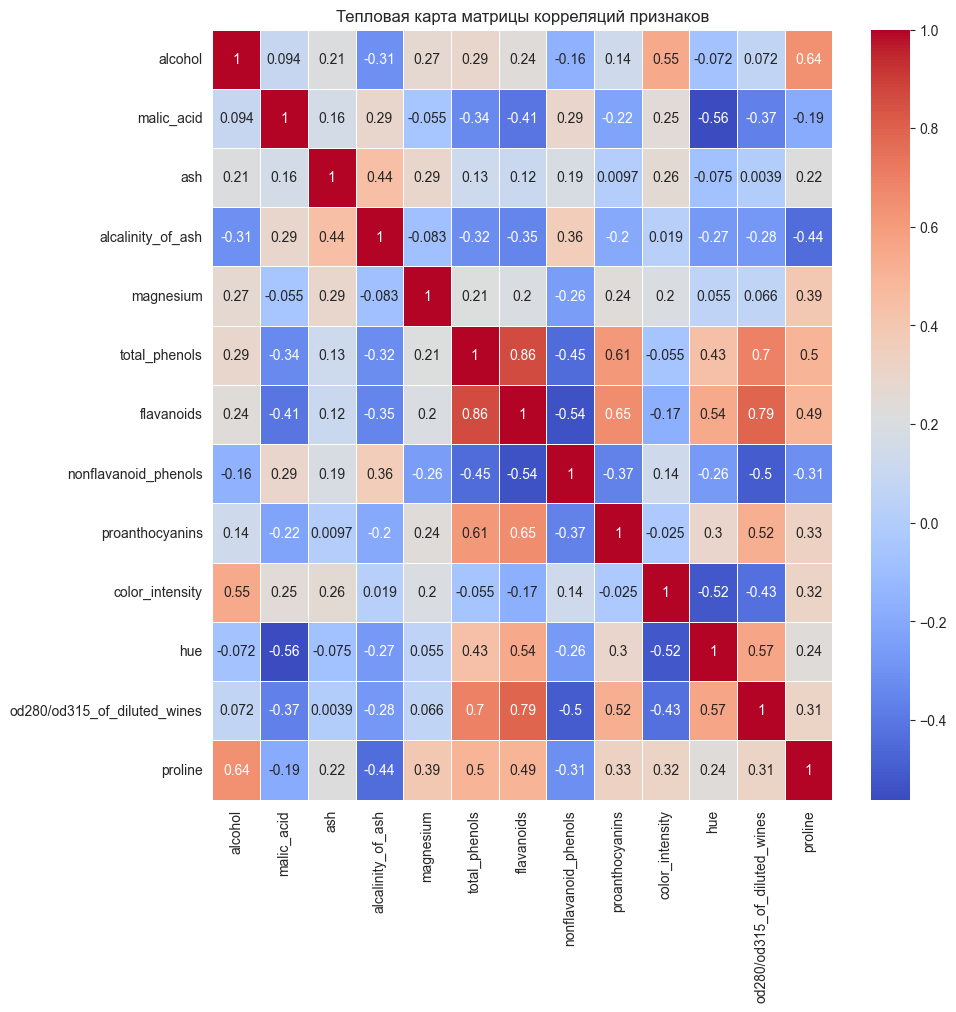

In [24]:
# Получаем матрицу корреляций
correlation_matrix = wine_df.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта матрицы корреляций признаков')
plt.show()

In [25]:
# Отбор признаков
# Порог корреляции = 0.65

columns_to_drop = ['flavanoids', 'proanthocyanins', 'od280/od315_of_diluted_wines']
wine_df.drop(columns=columns_to_drop, inplace=True)

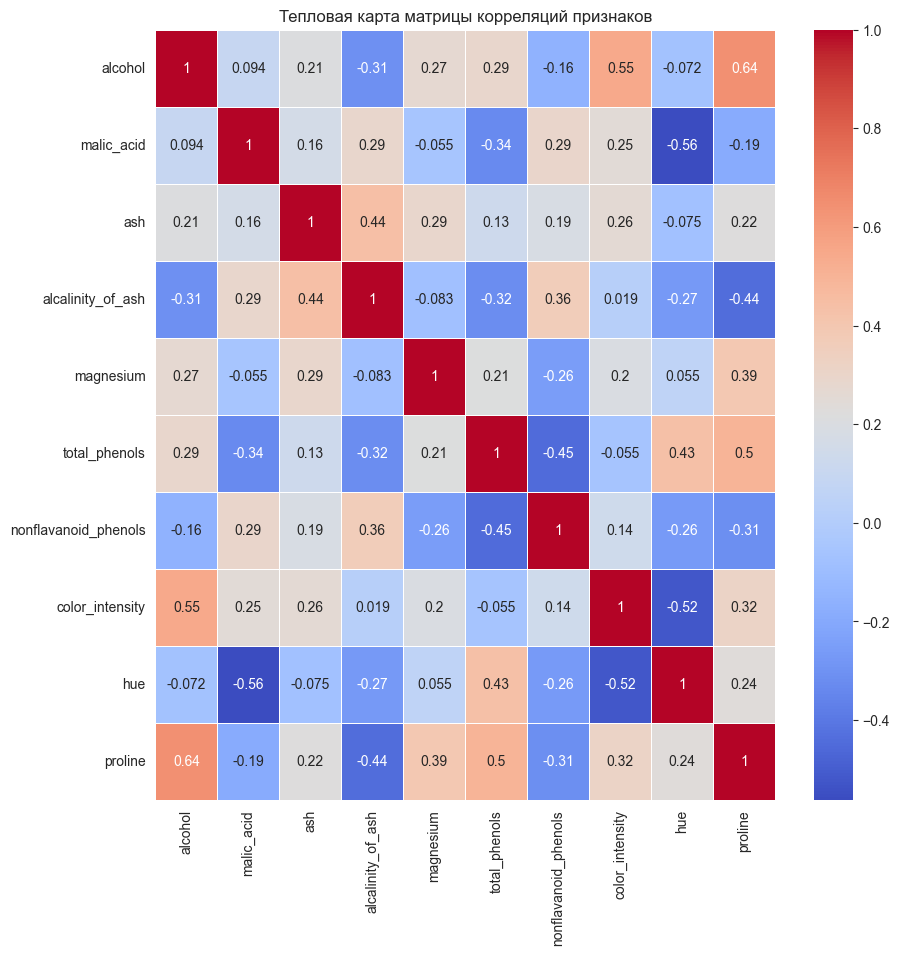

In [26]:
correlation_matrix = wine_df.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта матрицы корреляций признаков')
plt.show()

In [27]:
# Получение выборок

X = wine_df
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
# Обучение модели

model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9444444444444444